In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

In [148]:
i = 9

rh_df = []
h_df = []
path = '../../results/%s/MM/rh_%s_copula_selection.csv'%(result_names[i],
                                                             risk_measures[0])
Date = pd.to_datetime(pd.read_csv(path).Date)

for rm in risk_measures[:-1]:
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'%(result_names[i],
                                                             rm)
    _df = pd.read_csv(path)
    
    rh_df.append(_df.rh)
    h_df.append(_df.h)
    
rh_df = pd.concat(rh_df, axis=1)
rh_df.columns=risk_measures[:-1]

h_df = pd.concat(h_df, axis=1)
h_df.columns=risk_measures[:-1]

In [149]:
CH_OHR = pd.read_csv('../../results/%s/MM/rh_cross_hedge.csv'%result_names[i])
h_df.loc[:,'CH'] = CH_OHR.h
rh_df.loc[:,'CH'] = CH_OHR.rh

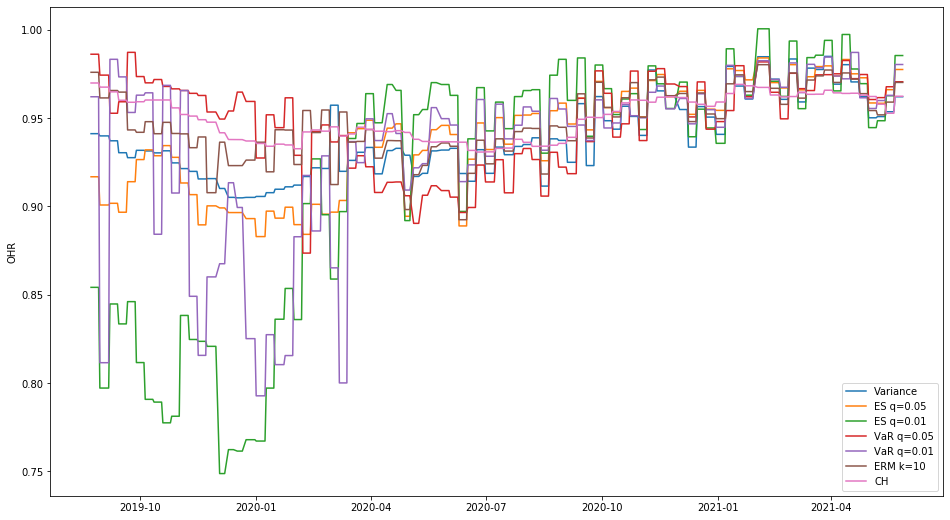

In [156]:
plt.figure(figsize=(16,9))

for i in range(h_df.shape[1]):

    plt.plot(Date, h_df.iloc[:,i], label=h_df.columns[i])
    plt.ylabel('OHR')
plt.legend()

In [151]:
h_means = np.mean(h_df)

var_arr = []
h0 = np.min(h_means)
h1 = np.max(h_means)
h_arr = np.linspace(h0,h1,100)

rs = _df.rs
rf = _df.rf
for h in h_arr:
    var_arr.append(np.sqrt(np.var(rs-h*rf)))


h0 = np.min([h0,h_arr[np.argmin(var_arr)] ])*0.95
h1 = np.max([h1,h_arr[np.argmin(var_arr)] ])*1.05

var_arr = []
h_arr = np.linspace(h0,h1,100)
for h in h_arr:
    var_arr.append(np.sqrt(np.var(rs-h*rf)))

In [152]:
print(h_means)
print(h_arr[np.argmin(var_arr)])

Variance      0.939120
ES q=0.05     0.939160
ES q=0.01     0.917398
VaR q=0.05    0.947339
VaR q=0.01    0.933514
ERM k=10      0.947323
CH            0.950069
dtype: float64
0.9619235436497906


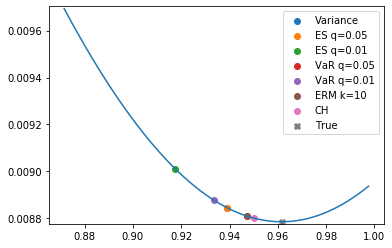

In [153]:
for i, h in enumerate(h_means):
    plt.scatter(h, np.sqrt(np.var(rs-h*rf)), label=h_df.columns[i])

plt.plot(h_arr, var_arr)
plt.ylim((np.min(var_arr)*0.999,np.max(var_arr)*1.001))
plt.scatter(h_arr[np.argmin(var_arr)], np.min((var_arr)),
            label='True', marker='X')
plt.legend()

In [91]:
print(h_arr[np.argmin(var_arr)], np.min(np.sqrt(var_arr)))

0.8443803522429596 0.2243515525341022


In [31]:
def get_block_min(r, step_size):
    M_arr = []
    for i in range(0, len(r), step_size):
        if i+step_size >= len(r):
            break
        else:
            M = np.min(r[i:i+step_size])
            M_arr.append(M)
            
    return M_arr

Variance -0.031712085196519
ES q=0.05 -0.031815488528081
ES q=0.01 -0.0422511741215468
VaR q=0.05 -0.0319426237718048
VaR q=0.01 -0.0316358040502847
ERM k=10 -0.0318968550840643
CH -0.031746357025101
25 22


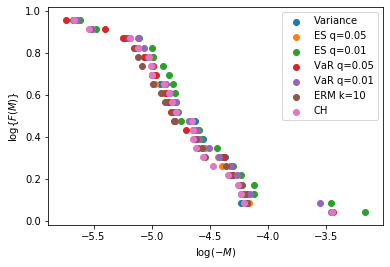

In [32]:
# Block Minima
Ms = []
step_size = 25

for rm in risk_measures:
    Ms.append(np.array(get_block_min(rh_df.loc[:,rm], step_size)))
    
for i, M in enumerate(Ms):
    ecdf = ECDF(M)
    x = np.sort(M)
    print(risk_measures[i], np.nanmin(M))
#     plt.scatter(np.log(-x), np.log(ecdf(x)), label=risk_measures[i])
    plt.scatter(np.log(-x),ecdf(x), label=risk_measures[i])
plt.legend()
plt.xlabel(r'$\log(-M)$')
plt.ylabel(r'$\log\{F(M)\}$')

print(step_size, len(Ms[0]))

In [29]:
np.var(rh_df)

Variance      0.000016
ES q=0.05     0.000016
ES q=0.01     0.000029
VaR q=0.05    0.000016
VaR q=0.01    0.000018
ERM k=10      0.000015
CH            0.000015
dtype: float64

In [866]:
thres = -0.005
erh1 = df1.rh[df1.rh < thres]
erh2 = df2.rh[df2.rh < thres]
print(len(erh1), len(erh2))

78 75


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

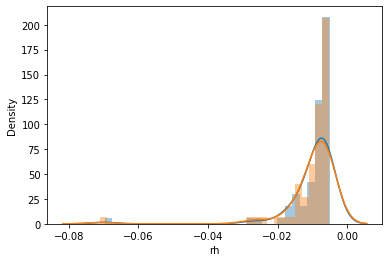

In [867]:
sns.distplot(erh1)
sns.distplot(erh2)

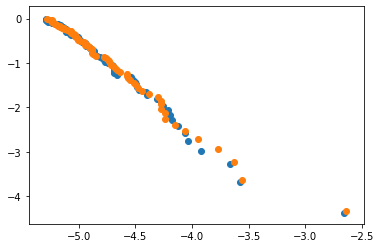

In [868]:
ecdf1 = ECDF(-erh1)
ecdf2 = ECDF(-erh2)

x = -np.sort(erh1)
y = -np.sort(erh2)

plt.scatter(np.log(x), np.log(1-ecdf1(x)))
plt.scatter(np.log(y), np.log(1-ecdf2(y)))

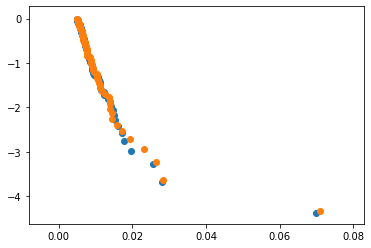

In [623]:
plt.scatter(x, np.log(1-ecdf1(x)))
plt.scatter(y, np.log(1-ecdf2(y)))